In [1]:
#Activity 9

#1: Importing the necessary libraries

from bs4 import BeautifulSoup
import re
import requests
import ssl

In [2]:
#2: Checking the SSL certificate using the given code

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [3]:
#3: Reading the HTML from the URL

URL = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(URL)

In [4]:
#4: Writing a function to check the status of the web request
def response_checker(response):
    if response.status_code == 200:
        print('Successful connection')
    else:
        print('Could not connect')
response_checker(response)

Successful connection


In [5]:
#5: Decoding the response and passing on to BeautifulSoup for HTML parsing

page_contents = response.content.decode(response.encoding)
soup = BeautifulSoup(page_contents, 'html.parser')

In [6]:
#6: Finding all the href tags and storing them in a list of links.
#   Checking how the list looks like by printing the first 30 elements.

list_of_links = []
filters = soup.find_all('a')
for link in filters:
    href_find = link.get('href')
    list_of_links.append(href_find)

list_of_links[0:31]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7',
 '#authors-last7']

In [7]:
#7: Using regular expression to find the numeric digits in the links (AKA the file number for the top 100 ebooks)

#8: Initializing an empty list to hold the file numbers over an appropriate range and using regex to find the numeric digits
#   in the link href string. Using the findall method.

#Indices 33 to 132 contain the file numbers for the first 100 ebooks, which are the top 100 ebooks.
#A for loop will iterate over this range and use regex to find each number and append it (as an integer) to an empty list.

ebook_number = []
for links in list_of_links[33:133]:
    links = links.strip()
    matched = int(re.findall('[0-9]+', links)[0])
    ebook_number.append(matched)
print('Top 100 ebook numbers: {}'.format(ebook_number))

Top 100 ebook numbers: [1342, 84, 11, 1080, 1661, 2701, 25344, 5200, 2542, 98, 1952, 174, 844, 64317, 1260, 408, 160, 76, 43, 46, 1232, 219, 1250, 345, 6133, 16, 205, 16328, 1497, 4300, 1400, 74, 23, 158, 3207, 19942, 514, 120, 1184, 57775, 64561, 902, 2814, 2852, 768, 2600, 42108, 55, 2591, 5740, 45, 215, 58585, 3825, 996, 64564, 1727, 2554, 36, 7370, 6130, 135, 3600, 20203, 64554, 64562, 147, 244, 15399, 829, 203, 1001, 2500, 1998, 140, 11030, 64559, 105, 113, 35, 730, 30254, 37134, 766, 25929, 236, 64331, 863, 851, 1064, 521, 23713, 779, 376, 4363, 2148, 41, 3090, 34901, 64553]


In [8]:
#9: Using the .text() method to find out what the soup object text looks like. Printing the first 2000 characters
#   (not printing the whole thing, as it is too long)

print(soup.text[0:2001])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2021-02-15203518
last 7 days1313263
last 30 days5728677



Top 100 EBooks yesterd

In [9]:
#10: Searching in the extracted text (using a regular expression) from the soup object to find the names of top 100 Ebooks 
#    (Yesterday's rank)

#11: Creating a starting index for the 100 ebooks yesterday.
#    Using splitlines() method on top of the soup.text to split the text lines of the soup object.

starting_index = soup.text.splitlines().index('Top 100 EBooks yesterday')

starting_index

113

In [10]:
#12: Looping to add the strings of the top 100 ebook lines to a temporary list. Using the splitlines() method.
#    Numbers 10 to 111 after the starting index are where the ebook titles are located.

temporary_list = []
for i in range(10, 111):
    temporary_list.append(soup.text.splitlines()[starting_index + i])

print('Top 100 ebook titles with numbers: {}'.format(temporary_list))

Top 100 ebook titles with numbers: ['Pride and Prejudice by Jane Austen (2426)', 'Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (2419)', "Alice's Adventures in Wonderland by Lewis Carroll (1049)", 'A Modest Proposal by Jonathan Swift (965)', 'The Adventures of Sherlock Holmes by Arthur Conan Doyle (909)', 'Moby Dick; Or, The Whale by Herman Melville (819)', 'The Scarlet Letter by Nathaniel Hawthorne (803)', 'Metamorphosis by Franz Kafka (800)', 'Et dukkehjem. English by Henrik Ibsen (789)', 'A Tale of Two Cities by Charles Dickens (784)', 'The Yellow Wallpaper by Charlotte Perkins Gilman (750)', 'The Picture of Dorian Gray by Oscar Wilde (724)', 'The Importance of Being Earnest: A Trivial Comedy for Serious People by Oscar Wilde (701)', 'The Great Gatsby by F. Scott  Fitzgerald (695)', 'Jane Eyre: An Autobiography by Charlotte Brontë (667)', 'The Souls of Black Folk by W. E. B.  Du Bois (620)', 'The Awakening, and Selected Short Stories by Kate Chopin (619)', '

In [11]:
#13: Using regular expressions to extract only text from the title strings, which will be appended to a list. 

#Using the match and span methods to find and use the indices of the text, which will then be used to slice the strings
#in the temporary list, and those string slices will then be appended to the empty list.
#A long regex had to be used since any non-alphanumeric character in authors' names would cause the string to end
ebook_titles = []
for i in range(0, 100):
    index_1, index_2 = re.match('^[a-zA-Z\d\s ]*[^a-zA-Z\d() ]*[a-zA-Z\d\s ]*[a-zA-Z\d\s ]*[^a-zA-Z\d() ]*[a-zA-Z\d\s ]*', temporary_list[i]).span()
    ebook_titles.append(temporary_list[i][index_1:index_2])

#Removing the whitespace at the end of each title 
new_titles = []
for title in ebook_titles:
    title = title[:len(title)-1]
    new_titles.append(title)

#Displaying the titles
for title in new_titles:
    print(title)

Pride and Prejudice by Jane Austen
Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley
Alice's Adventures in Wonderland by Lewis Carroll
A Modest Proposal by Jonathan Swift
The Adventures of Sherlock Holmes by Arthur Conan Doyle
Moby Dick; Or, The Whale by Herman Melville
The Scarlet Letter by Nathaniel Hawthorne
Metamorphosis by Franz Kafka
Et dukkehjem. English by Henrik Ibsen
A Tale of Two Cities by Charles Dickens
The Yellow Wallpaper by Charlotte Perkins Gilman
The Picture of Dorian Gray by Oscar Wilde
The Importance of Being Earnest: A Trivial Comedy for Serious People by Oscar Wilde
The Great Gatsby by F. Scott  Fitzgerald
Jane Eyre: An Autobiography by Charlotte Brontë
The Souls of Black Folk by W. E. 
The Awakening, and Selected Short Stories by Kate Chopin
Adventures of Huckleberry Finn by Mark Twain
The Strange Case of Dr. Jekyll and Mr. Hyde by Robert Louis Stevenson
A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens
Il Princi

In [12]:
#Activity 10

#1: Importing the necessary libraries
import urllib.request as UR
import urllib.parse as UP
import urllib.error as UE
import json

In [13]:
#2: Loading the secret API key from a JSON file, stored in the same folder, by using json.load().
#I have stored the API key in a JSON file (step 3) and I open the JSON file (step 4) below

with open('APIkey.json') as fd:
    APIKey = json.load(fd)
    OMDb_API = APIKey['OMDBapi']

In [14]:
#5: Assigning the OMDb portal as a string variable
BaseURL = 'http://www.omdbapi.com/?'

#6: Creating a variable with the second portion of the URL containing my API key

URL_API = '&apikey={}'.format(OMDb_API)

In [15]:
#7: Writing a utility function called print_json to print the movie data from a JSON file

def print_json(json_file):
    #List of the categories in the JSON files returned by the OMDb API
    json_categories = ['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 
                 'Language', 'Country', 'Awards', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    
    #Iterating over the list to print each category followed by its value from the JSON file
    for k in json_categories:
        print(f'{k} : {json_file[k]}')
        

In [16]:
#8: Writing a utility function to download a poster of the selected movie in my local folder, based on the information 
#   returned from the JSON file.

#First importing the os module required
import os

#Function to download the poster
def download_poster(json_file):
    #Pulling the movie title and poster link from the JSON file
    title = str(json_file['Title'])
    poster_link = json_file['Poster']
    
    #Reading the poster image data by passing the poster link through the urllib.request library
    poster = UR.urlopen(poster_link).read()
    
    #Defining the image file's save location in the current working directory
    save_location = os.getcwd() + '\\'
    
    #Getting the file extension from the poster URL by grabbing the last value from the URL split by its dots
    #Usually images will end in '.JPEG' or '.PNG' so the last set of characters after the last dot should be the extension.
    poster_file_extension = poster_link.split('.')[-1]
    
    #If the file extension is one of the most common image extensions, the file will be downloaded
    if poster_file_extension.upper() == 'JPEG' or poster_file_extension.upper() == 'JPG' or poster_file_extension.upper() == 'PNG':
        #Defining what the saved file will be named
        filename = '{}{}{}{}'.format(save_location, title, '.', poster_file_extension)

        #Opening a brand new file, writing the image data to it, then closing it
        with open(filename,'wb') as f:
            f.write(poster)
            f.close()
        

In [17]:
#9: Writing a utility function called search_movie to search a movie by its name, print the downloaded JSON data 
#   using the print_json function, and save the movie poster in the local folder. Try-except statements will be used
#   to catch any errors that may have occurred.

def search_movie(movie_title):
    try:
        #Passing a dictionary with a key, t, and the input movie title to urllib.parse.urlencode() function
        #as stated in the problem. The base URL will be added and API key to build the full URL.
        url = BaseURL + UP.urlencode({'t': str(movie_title)}) + URL_API
        
        #Reading the movie data by passing the poster link through the urllib.request library then loading the JSON, as with
        #the above function. The data is then loaded with json.load() function.
        
        data = UR.urlopen(url).read()
        json_data = json.loads(data)
        
        #The movie data will only be printed if a response is received
        if json_data['Response'] == 'True':
            print_json(json_data)
            #If a response is received but the movie has no poster, the poster will not be downloaded.
            if json_data['Poster'] != 'N/A':
                download_poster(json_data)
        else:
            print('ERROR!')
    
    except:
        print('ERROR!')

In [18]:
#Writing a function to display the downloaded poster directly in Jupyter Notebook.

def show_image(movie_name):
    try:
        from IPython.display import Image, display
        display(Image(filename = '{}.jpg'.format(movie_name)))
    except:
        print('ERROR!')

Title : Titanic
Year : 1997
Rated : PG-13
Released : 19 Dec 1997
Runtime : 194 min
Genre : Drama, Romance
Director : James Cameron
Writer : James Cameron
Actors : Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates
Plot : A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language : English, Swedish, Italian, French
Country : USA, Mexico
Awards : Won 11 Oscars. Another 112 wins & 83 nominations.
Ratings : [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '89%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore : 75
imdbRating : 7.8
imdbVotes : 1,048,704
imdbID : tt0120338


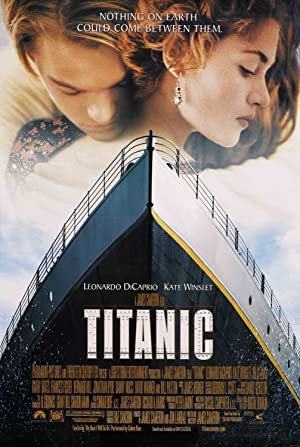

 
ERROR!
ERROR!


In [19]:
#Testing the functions on the movie Titanic
titanic = 'Titanic'
search_movie(titanic)
show_image(titanic)
print(' ')

#Testing to see if an error occurs
search_movie('No Movie Found')
show_image('No Movie Found')

In [20]:
#Twitter exercise
#Connecting to the Twitter API and doing a simple data pull

#Importing the Python Twitter library
import twitter

#Importing the JSON files containing the consumer key, secret key, access token key, and secret token key
with open('consumer_key.json') as A:
    consumerKey = json.load(A)['consumer_key']
    
with open('consumer_secret.json') as B:
    consumerSecret = json.load(B)['consumer_secret']
    
with open('access_token_key.json') as C:
    accessKey = json.load(C)['access_token_key']
    
with open('access_token_secret.json') as D:
    accessSecret = json.load(D)['access_token_secret']
    

#Connecting to the Twitter API using my API keys
api = twitter.Api(consumer_key = consumerKey,
                  consumer_secret = consumerSecret,
                  access_token_key = accessKey,
                  access_token_secret = accessSecret)

#Pulling back data searching for 'Bellevue University' and 'Data Science'
#I specified for each query to pull back 100 tweets since December 14, 2020
results1 = api.GetSearch(raw_query="q=Bellevue%20University&result_type=recent&since=2020-12-14&count=100")
results2 = api.GetSearch(raw_query="q=Data%20Science&result_type=recent&since=2020-12-14&count=100")

#Printing the results
print('Results of search query Bellevue University: {}\n'.format(results1))
print('Results of search query Data Science: {}'.format(results2))

Results of search query Bellevue University: [Status(ID=1361833927451754496, ScreenName=Cheyenneisback_, Created=Wed Feb 17 00:24:44 +0000 2021, Text='RT @BUBruins: To all those in Bruin Nation:\n\nCheck out https://t.co/x3PK3xaoHh tomorrow at 8 a.m. for an exciting reveal by the Bellevue Un…'), Status(ID=1361813727591415810, ScreenName=thinmanx11, Created=Tue Feb 16 23:04:28 +0000 2021, Text='RT @BUBruins: To all those in Bruin Nation:\n\nCheck out https://t.co/x3PK3xaoHh tomorrow at 8 a.m. for an exciting reveal by the Bellevue Un…'), Status(ID=1361791841541238785, ScreenName=BillMullinsSID, Created=Tue Feb 16 21:37:30 +0000 2021, Text='RT @BUBruins: To all those in Bruin Nation:\n\nCheck out https://t.co/x3PK3xaoHh tomorrow at 8 a.m. for an exciting reveal by the Bellevue Un…'), Status(ID=1361791701296160771, ScreenName=BUBruins, Created=Tue Feb 16 21:36:57 +0000 2021, Text='To all those in Bruin Nation:\n\nCheck out https://t.co/x3PK3xaoHh tomorrow at 8 a.m. for an exciting reveal 

In [21]:
#Data visualizations

#I will be building visualizations based on my cleaned flat file from my final project 
#Importing and viewing the data
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.full.FinalProjectBKudaimiPart1 import *

cars

,Make,Model,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,2.311111,4.000000,9.944444,6.966667,8.600000,32.777778,199.222222
1,ACURA,MDX,3.500000,6.000000,12.404167,9.175000,10.945833,25.666667,254.875000
2,ACURA,NSX,3.500000,6.000000,11.100000,10.800000,11.000000,26.000000,261.000000
3,ACURA,RDX,2.535714,4.714286,11.607143,8.878571,10.371429,27.071429,242.250000
4,ACURA,RLX,3.500000,6.000000,11.900000,7.700000,10.000000,28.000000,231.666667
...,...,...,...,...,...,...,...,...,...
404,VOLVO,V90,2.000000,4.000000,10.600000,7.550000,9.233333,30.500000,215.500000
405,VOLVO,XC40,2.000000,4.000000,10.350000,7.550000,9.100000,30.750000,212.500000
406,VOLVO,XC60,2.537037,4.962963,12.070370,8.818519,10.607407,27.000000,245.111111
407,VOLVO,XC70,2.760000,5.400000,12.480000,9.070000,10.940000,26.200000,252.200000


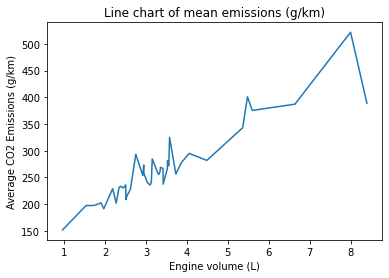

In [22]:
#Line chart

#First splitting by car make, finding averages of all attributes for each make, then sorting by the mean engine volumes
grouped = cars.groupby('Make').mean().sort_values('Engine Size(L)')

#Plotting the line of mean CO2 emissions vs mean engine size
plt.plot(grouped['Engine Size(L)'], grouped['CO2 Emissions(g/km)'])
plt.title('Line chart of mean emissions (g/km)')
plt.xlabel('Engine volume (L)')
plt.ylabel('Average CO2 Emissions (g/km)')
plt.show()

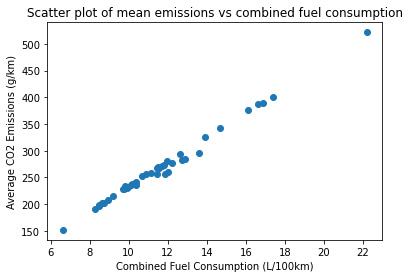

In [23]:
#Scatter plot

#This time, plotting CO2 emissions vs fuel economy for all the car makes
plt.scatter(grouped['Fuel Consumption Comb (L/100 km)'], grouped['CO2 Emissions(g/km)'])
plt.title('Scatter plot of mean emissions vs combined fuel consumption')
plt.xlabel('Combined Fuel Consumption (L/100km)')
plt.ylabel('Average CO2 Emissions (g/km)')
plt.show()

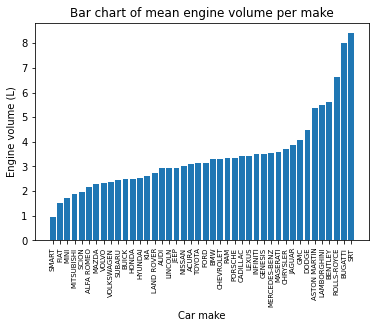

In [24]:
#Bar chart

#Plotting the average engine volume for each car make
plt.bar(list(grouped.index), grouped['Engine Size(L)'])
plt.title('Bar chart of mean engine volume per make')
plt.xlabel('Car make')
plt.ylabel('Engine volume (L)')
plt.xticks(fontsize = 7, rotation = 90)
plt.show()

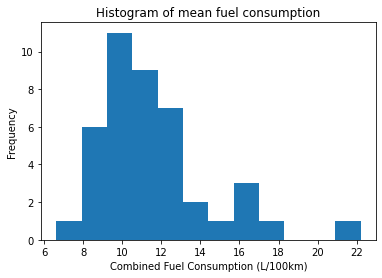

In [25]:
#Histogram

#Frequencies of the fuel consumptions 
plt.hist(grouped['Fuel Consumption Comb (L/100 km)'], bins = 12)
plt.title('Histogram of mean fuel consumption')
plt.xlabel('Combined Fuel Consumption (L/100km)')
plt.ylabel('Frequency')
plt.show()

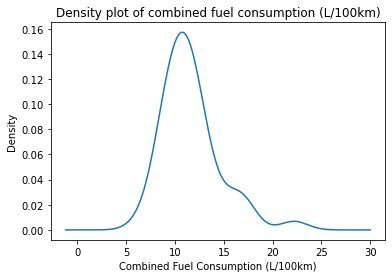

In [26]:
#Density Plot

#Probability density of each fuel consumption
grouped['Fuel Consumption Comb (L/100 km)'].plot.density()
plt.xlabel('Combined Fuel Consumption (L/100km)')
plt.title('Density plot of combined fuel consumption (L/100km)')
plt.show()

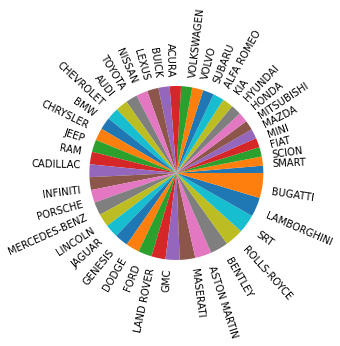

In [27]:
#Pie Chart

#Pie chart showing the slice of average CO2 emissions each make is responsible for
#The largest wedge starts at the 3:00 position and the sizes descend clockwise
plt.pie(grouped['CO2 Emissions(g/km)'].sort_values(), labels = grouped['CO2 Emissions(g/km)'].sort_values().index, rotatelabels = True)
plt.show()